In [1]:
import numpy as np
import scanpy as sc
import squidpy as sq
import pandas as pd
import plotly.express as px

In [2]:
adata=sc.read_h5ad("/nfs/team283/yd2/WE_n3_scRNAseq_filt_cells_filt_genes_raw_counts_with_QC_and_annots_lvl5_20240404.h5ad")

In [3]:
adata.obs['cell_type_lvl5'].unique().tolist()

['schwann cell precursor',
 'intermediate neural progenitor',
 'sclerotome',
 'intermediate mesoderm OSR1+',
 'erythroid HBE1+GATA1+',
 'lateral plate mesoderm PRRX1+GATA6+',
 'oligodendrocyte precursor',
 'MN',
 'dermal fibroblast FRZB+',
 'schwann cell precursor sensory',
 'meningeal fibroblast',
 'skeletal myoblast',
 'tendon progenitor',
 'V2 interneuron',
 'TREM2+ macrophage',
 'limb chondrocyte precursor SOX6+',
 'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',
 'early endothelium',
 'radial glia',
 'intevertebral disc',
 'macrophage',
 'V1 interneuron',
 'dermal fibroblast FRZB+FOXF1+',
 'V0 interneuron',
 'proprioceptive neuron',
 'DL2 neuron',
 'skeletal myocyte',
 'fibroblast progenitors PDGFRA+',
 'mural PDGFRB+',
 'schwann cell precursor early autonomic',
 'p2 neural progenitor',
 'keratinocyte lower genital',
 'DL5 neuron',
 'enteric neuron',
 'DL3 neuron',
 'DL6 neuron',
 'early lymphatic endothelium',
 'skeletal myoblast hypaxial',
 'floor plate',
 'megakaryocyte',
 'pA2 neu

In [63]:
fibro = adata[adata.obs.cell_type_lvl5.str.match('dermal fibroblast FRZB+|meningeal fibroblast')]

In [64]:
fibro=fibro[fibro.obs.cell_type_lvl5!='dermal fibroblast FRZB+WNT2+', :]
fibro=fibro[fibro.obs.cell_type_lvl5!='dermal fibroblast FRZB+', :]

In [65]:
fibro.obs['cell_type_lvl5'].unique().tolist()

['meningeal fibroblast',
 'dermal fibroblast FRZB+FOXF1+',
 'dermal fibroblast FRZB+SIX2+']

In [66]:
fibro

View of AnnData object with n_obs × n_vars = 25868 × 34584
    obs: 'dataset', 'sequencing_lane_ID', 'haniffa_ID', 'HDBR_ID', 'sequencing_type', '10x_kit', 'spatial_location', 'spatial_location_replicates', 'sort_ID', 'procedure', 'age_in_cs', 'sex', 'alignment_software', 'alignment_reference', 'nGene', 'nGene_eq-to-morethan_500', 'nUMI', 'nUMI_morethan_1000', 'passes_QC_step_1', 'percent_mito', 'percent_mito_eq-or-morethan_10pct', 'maternal_predicted', 'cutoff_3_is_doublet', 'passes_QC_step_2', 'passes_QC_step_1_and_2', 'leiden_res_3', 'leiden_res_3_sub_res_0-5', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lvl4-unlinked', 'cell_type_lvl5'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'Used_in_scvi', 'n_cells_by_counts', 'nCells_eq-to-morethan_5', 'passes_QC_step_1'

In [67]:
sc.pp.normalize_total(fibro, target_sum=1e4)
sc.pp.log1p(fibro)
#sc.pp.scale(fibro, max_value=10)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [68]:
sc.tl.rank_genes_groups(fibro, 'cell_type_lvl5', method='wilcoxon')


/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


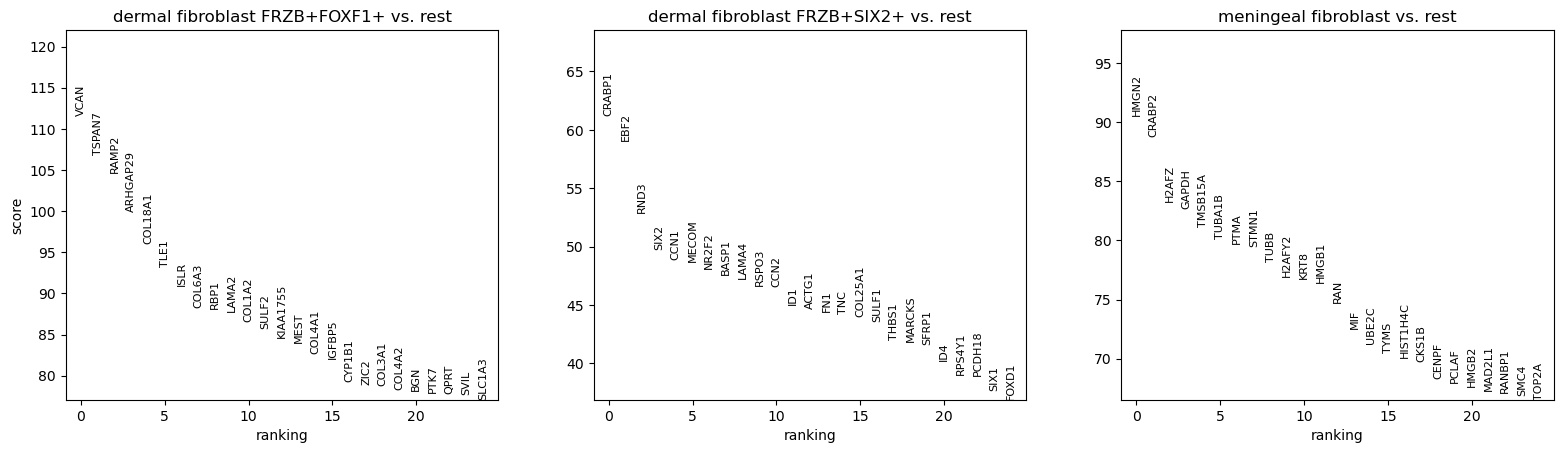

In [69]:
sc.pl.rank_genes_groups(fibro, n_genes=25, sharey=False)


In [70]:
fibro.uns['rank_genes_groups']

{'params': {'groupby': 'cell_type_lvl5',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('VCAN', 'CRABP1', 'HMGN2'), ('TSPAN7', 'EBF2', 'CRABP2'),
            ('RAMP2', 'RND3', 'H2AFZ'), ...,
            ('H2AFZ', 'RAMP2', 'ARHGAP29'), ('TMSB15A', 'QPRT', 'COL1A2'),
            ('CRABP2', 'RBP1', 'VCAN')],
           dtype=[('dermal fibroblast FRZB+FOXF1+', 'O'), ('dermal fibroblast FRZB+SIX2+', 'O'), ('meningeal fibroblast', 'O')]),
 'scores': rec.array([( 111.64051 ,  61.236237,   90.58421 ),
            ( 106.864296,  59.088654,   88.815475),
            ( 104.63554 ,  52.89535 ,   83.28626 ), ...,
            ( -86.17135 , -52.196056,  -74.33164 ),
            ( -89.075356, -53.180367,  -85.452965),
            (-108.720375, -84.18537 , -105.03428 )],
           dtype=[('dermal fibroblast FRZB+FOXF1+', '<f4'), ('dermal fibroblast FRZB+SIX2+', '<f4'), ('meningeal fibroblast', '<f4')]),


In [71]:
result = fibro.uns['rank_genes_groups']
groups= result['names'].dtype.names
df= pd.DataFrame(
    {group + '_' + key[:15]:result [key][group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [72]:
df

,dermal fibroblast FRZB+FOXF1+_names,dermal fibroblast FRZB+FOXF1+_scores,dermal fibroblast FRZB+FOXF1+_pvals,dermal fibroblast FRZB+FOXF1+_pvals_adj,dermal fibroblast FRZB+FOXF1+_logfoldchanges,dermal fibroblast FRZB+SIX2+_names,dermal fibroblast FRZB+SIX2+_scores,dermal fibroblast FRZB+SIX2+_pvals,dermal fibroblast FRZB+SIX2+_pvals_adj,dermal fibroblast FRZB+SIX2+_logfoldchanges,meningeal fibroblast_names,meningeal fibroblast_scores,meningeal fibroblast_pvals,meningeal fibroblast_pvals_adj,meningeal fibroblast_logfoldchanges
0,VCAN,111.640511,0.0,0.0,2.702108,CRABP1,61.236237,0.0,0.0,4.510821,HMGN2,90.584213,0.0,0.0,1.549520
1,TSPAN7,106.864296,0.0,0.0,4.478298,EBF2,59.088654,0.0,0.0,3.748087,CRABP2,88.815475,0.0,0.0,3.016081
2,RAMP2,104.635536,0.0,0.0,2.736719,RND3,52.895351,0.0,0.0,1.408120,H2AFZ,83.286263,0.0,0.0,1.474822
3,ARHGAP29,99.968170,0.0,0.0,2.607401,SIX2,49.721077,0.0,0.0,2.779074,GAPDH,82.719109,0.0,0.0,0.725943
4,COL18A1,96.044724,0.0,0.0,2.314915,CCN1,48.901863,0.0,0.0,1.062195,TMSB15A,81.129898,0.0,0.0,1.821521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,ACTB,-81.589745,0.0,0.0,-0.643702,TLE1,-48.696743,0.0,0.0,-1.509285,COL18A1,-71.871162,0.0,0.0,-2.068786
34580,TUBA1B,-85.643829,0.0,0.0,-1.449764,TSPAN7,-51.815720,0.0,0.0,-3.196153,TSPAN7,-72.407936,0.0,0.0,-4.056724
34581,H2AFZ,-86.171349,0.0,0.0,-1.400898,RAMP2,-52.196056,0.0,0.0,-1.913336,ARHGAP29,-74.331642,0.0,0.0,-2.420790
34582,TMSB15A,-89.075356,0.0,0.0,-2.004868,QPRT,-53.180367,0.0,0.0,-1.265365,COL1A2,-85.452965,0.0,0.0,-1.518862


         Falling back to preprocessing with `sc.pp.pca` and default params.


/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 

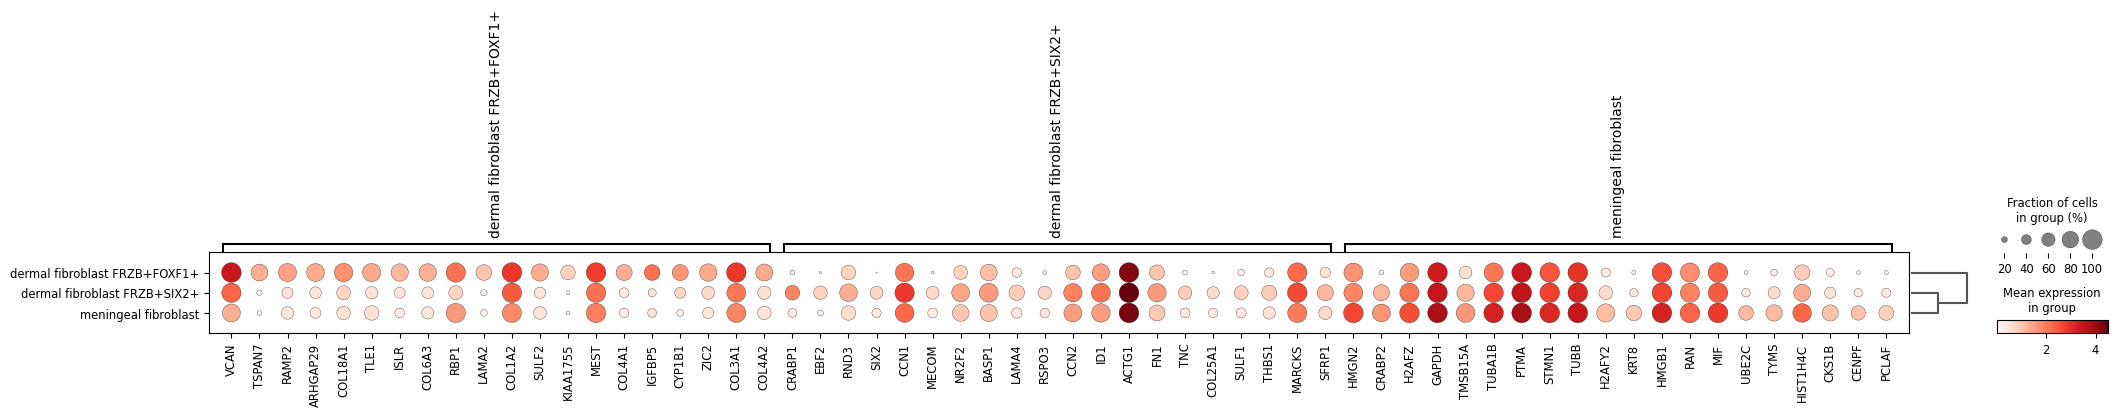

In [73]:
sc.pl.rank_genes_groups_dotplot(fibro, n_genes=20)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


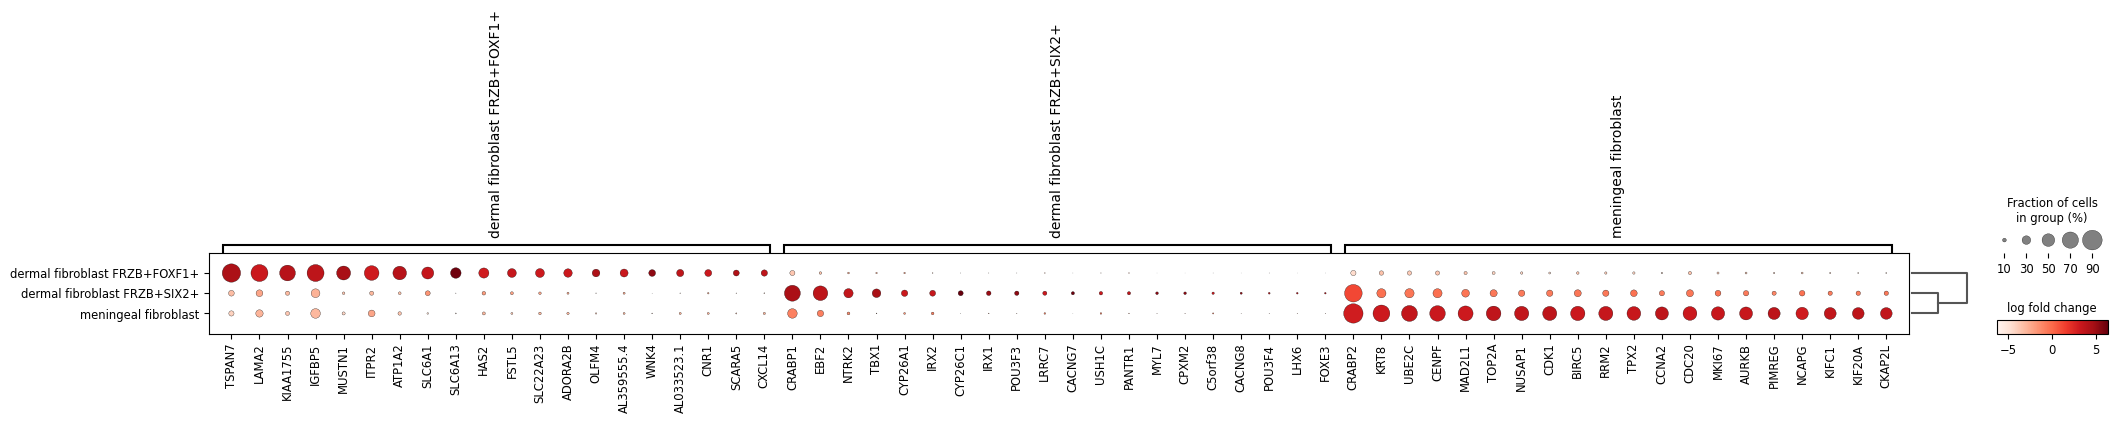

In [74]:
sc.pl.rank_genes_groups_dotplot(fibro, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=20)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


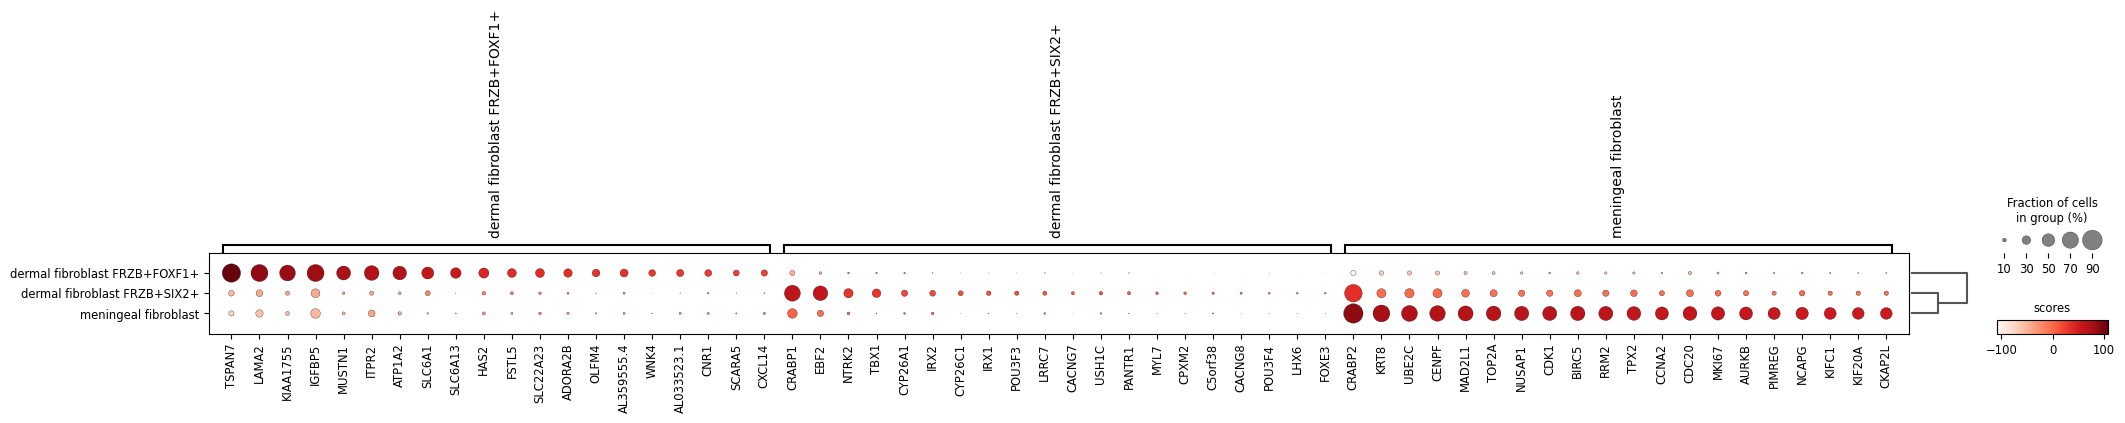

In [76]:
sc.pl.rank_genes_groups_dotplot(fibro, values_to_plot='scores', min_logfoldchange=3, n_genes=20)

In [77]:
df

,dermal fibroblast FRZB+FOXF1+_names,dermal fibroblast FRZB+FOXF1+_scores,dermal fibroblast FRZB+FOXF1+_pvals,dermal fibroblast FRZB+FOXF1+_pvals_adj,dermal fibroblast FRZB+FOXF1+_logfoldchanges,dermal fibroblast FRZB+SIX2+_names,dermal fibroblast FRZB+SIX2+_scores,dermal fibroblast FRZB+SIX2+_pvals,dermal fibroblast FRZB+SIX2+_pvals_adj,dermal fibroblast FRZB+SIX2+_logfoldchanges,meningeal fibroblast_names,meningeal fibroblast_scores,meningeal fibroblast_pvals,meningeal fibroblast_pvals_adj,meningeal fibroblast_logfoldchanges
0,VCAN,111.640511,0.0,0.0,2.702108,CRABP1,61.236237,0.0,0.0,4.510821,HMGN2,90.584213,0.0,0.0,1.549520
1,TSPAN7,106.864296,0.0,0.0,4.478298,EBF2,59.088654,0.0,0.0,3.748087,CRABP2,88.815475,0.0,0.0,3.016081
2,RAMP2,104.635536,0.0,0.0,2.736719,RND3,52.895351,0.0,0.0,1.408120,H2AFZ,83.286263,0.0,0.0,1.474822
3,ARHGAP29,99.968170,0.0,0.0,2.607401,SIX2,49.721077,0.0,0.0,2.779074,GAPDH,82.719109,0.0,0.0,0.725943
4,COL18A1,96.044724,0.0,0.0,2.314915,CCN1,48.901863,0.0,0.0,1.062195,TMSB15A,81.129898,0.0,0.0,1.821521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,ACTB,-81.589745,0.0,0.0,-0.643702,TLE1,-48.696743,0.0,0.0,-1.509285,COL18A1,-71.871162,0.0,0.0,-2.068786
34580,TUBA1B,-85.643829,0.0,0.0,-1.449764,TSPAN7,-51.815720,0.0,0.0,-3.196153,TSPAN7,-72.407936,0.0,0.0,-4.056724
34581,H2AFZ,-86.171349,0.0,0.0,-1.400898,RAMP2,-52.196056,0.0,0.0,-1.913336,ARHGAP29,-74.331642,0.0,0.0,-2.420790
34582,TMSB15A,-89.075356,0.0,0.0,-2.004868,QPRT,-53.180367,0.0,0.0,-1.265365,COL1A2,-85.452965,0.0,0.0,-1.518862


In [78]:
df.to_csv('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/fibroblast_markers.csv')

In [81]:
adata=sc.read_h5ad("/nfs/team283/yd2/WE_n3_scRNAseq_filt_cells_filt_genes_raw_counts_with_QC_and_annots_lvl5_20240404.h5ad")

In [82]:
adata.obs['cell_type_lvl5'].unique().tolist()

['schwann cell precursor',
 'intermediate neural progenitor',
 'sclerotome',
 'intermediate mesoderm OSR1+',
 'erythroid HBE1+GATA1+',
 'lateral plate mesoderm PRRX1+GATA6+',
 'oligodendrocyte precursor',
 'MN',
 'dermal fibroblast FRZB+',
 'schwann cell precursor sensory',
 'meningeal fibroblast',
 'skeletal myoblast',
 'tendon progenitor',
 'V2 interneuron',
 'TREM2+ macrophage',
 'limb chondrocyte precursor SOX6+',
 'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',
 'early endothelium',
 'radial glia',
 'intevertebral disc',
 'macrophage',
 'V1 interneuron',
 'dermal fibroblast FRZB+FOXF1+',
 'V0 interneuron',
 'proprioceptive neuron',
 'DL2 neuron',
 'skeletal myocyte',
 'fibroblast progenitors PDGFRA+',
 'mural PDGFRB+',
 'schwann cell precursor early autonomic',
 'p2 neural progenitor',
 'keratinocyte lower genital',
 'DL5 neuron',
 'enteric neuron',
 'DL3 neuron',
 'DL6 neuron',
 'early lymphatic endothelium',
 'skeletal myoblast hypaxial',
 'floor plate',
 'megakaryocyte',
 'pA2 neu

In [83]:
subtypes = ['meningeal fibroblast',
'dermal fibroblast FRZB+FOXF1+',
'dermal fibroblast FRZB+SIX2+',
'dermal fibroblast progenitor',
'limb fibroblast',
'limb myofibroblast',
'myofibroblast',
'fibroblast progenitors PDGFRA+',
'fibroblast progenitors PDGFRA+ZIC1+',
'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',
'fibroblast progenitors PDGFRA+IRX2+',
'fibroblast progenitors PDGFRA+GATA6+',
'kidney fibroblast']

In [91]:
fibro = adata[adata.obs.cell_type_lvl5.isin(subtypes), :]

In [92]:
fibro.obs['cell_type_lvl5'].unique().tolist()

['meningeal fibroblast',
 'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',
 'dermal fibroblast FRZB+FOXF1+',
 'fibroblast progenitors PDGFRA+',
 'myofibroblast',
 'fibroblast progenitors PDGFRA+IRX2+',
 'dermal fibroblast progenitor',
 'limb myofibroblast',
 'kidney fibroblast',
 'fibroblast progenitors PDGFRA+GATA6+',
 'limb fibroblast',
 'dermal fibroblast FRZB+SIX2+',
 'fibroblast progenitors PDGFRA+ZIC1+']

In [93]:
sc.pp.normalize_total(fibro, target_sum=1e4)
sc.pp.log1p(fibro)
#sc.pp.scale(fibro, max_value=10)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [94]:
sc.tl.rank_genes_groups(fibro, 'cell_type_lvl5', method='wilcoxon')


/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


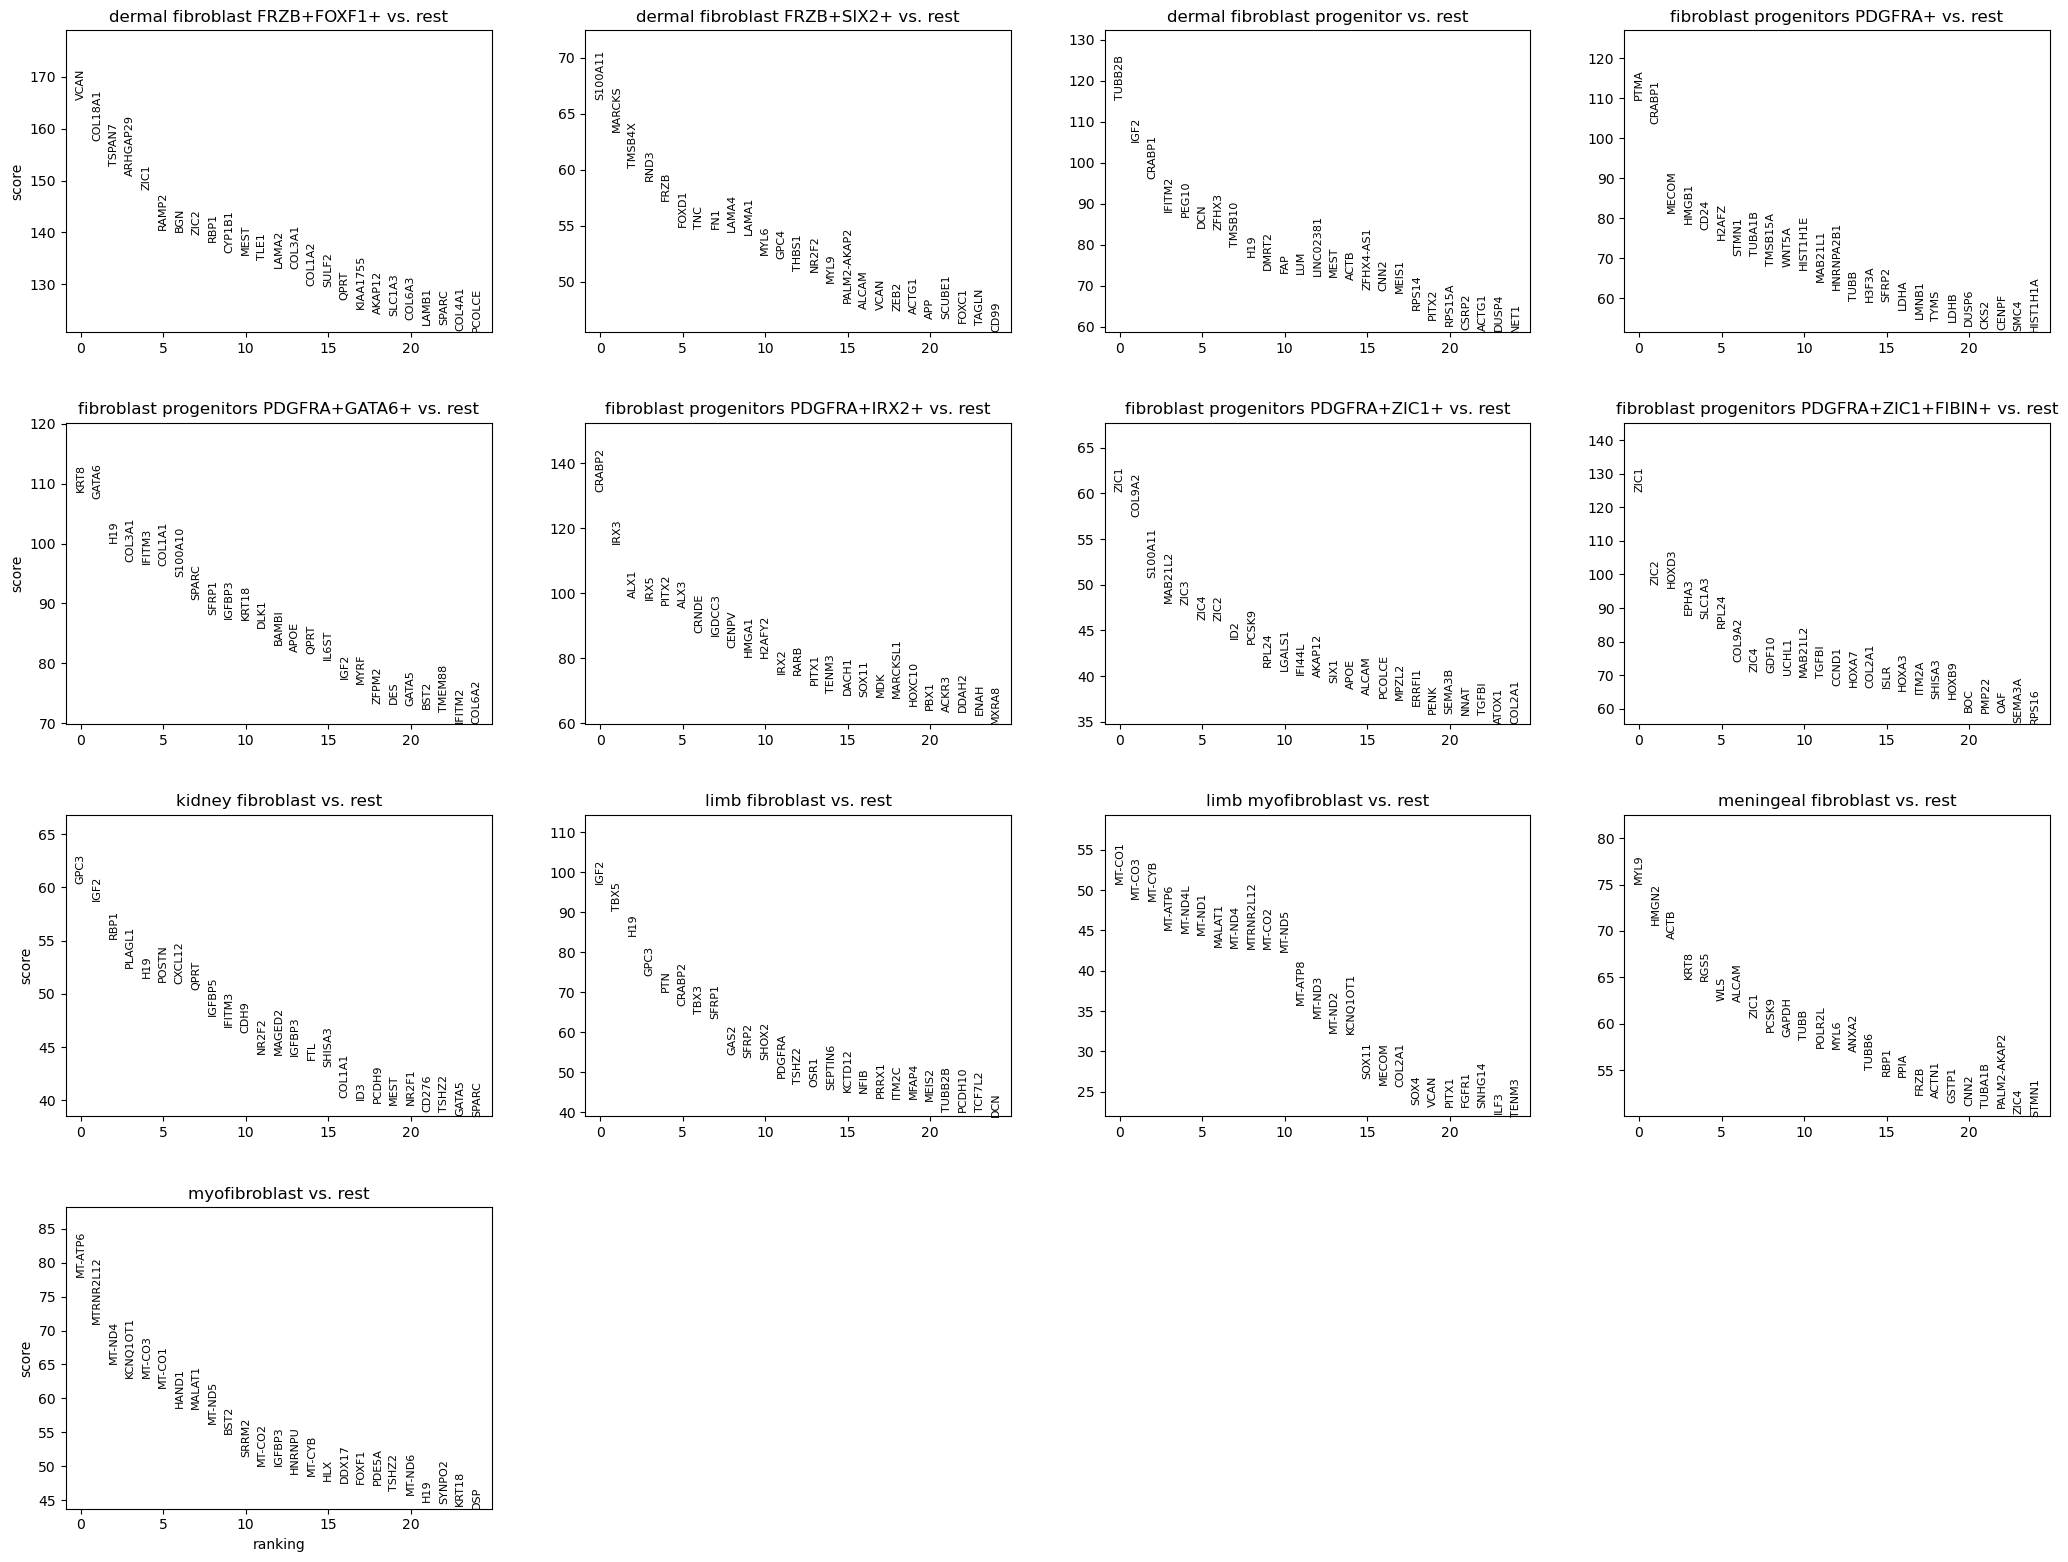

In [95]:
sc.pl.rank_genes_groups(fibro, n_genes=10, sharey=False)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level

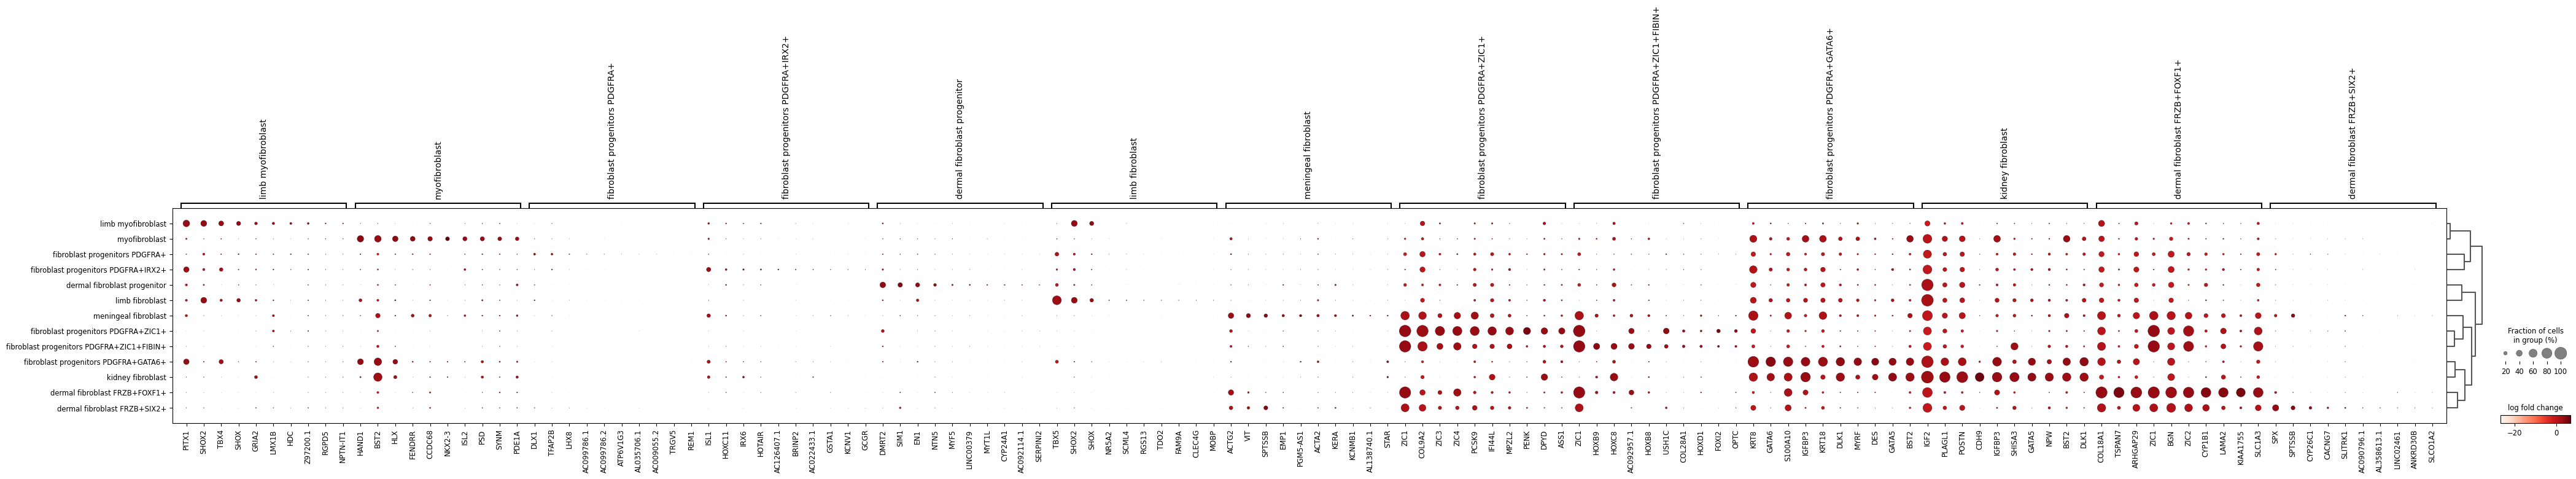

In [96]:
sc.pl.rank_genes_groups_dotplot(fibro, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=10)

In [97]:
fibro.write_h5ad('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/fibroblasts_wilcoxon.h5ad')

In [98]:
fibro

AnnData object with n_obs × n_vars = 212068 × 34584
    obs: 'dataset', 'sequencing_lane_ID', 'haniffa_ID', 'HDBR_ID', 'sequencing_type', '10x_kit', 'spatial_location', 'spatial_location_replicates', 'sort_ID', 'procedure', 'age_in_cs', 'sex', 'alignment_software', 'alignment_reference', 'nGene', 'nGene_eq-to-morethan_500', 'nUMI', 'nUMI_morethan_1000', 'passes_QC_step_1', 'percent_mito', 'percent_mito_eq-or-morethan_10pct', 'maternal_predicted', 'cutoff_3_is_doublet', 'passes_QC_step_2', 'passes_QC_step_1_and_2', 'leiden_res_3', 'leiden_res_3_sub_res_0-5', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lvl4-unlinked', 'cell_type_lvl5'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'Used_in_scvi', 'n_cells_by_counts', 'nCells_eq-to-morethan_5', 'passes_QC_step_1'
    uns: 'log1p', 'rank_genes_groups', 'dendrogram_cell_type_lvl5'
    obsm: 'X_pca'

In [2]:
fibro=sc.read_h5ad('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/fibroblasts_wilcoxon.h5ad')

In [3]:
fibro

AnnData object with n_obs × n_vars = 212068 × 34584
    obs: 'dataset', 'sequencing_lane_ID', 'haniffa_ID', 'HDBR_ID', 'sequencing_type', '10x_kit', 'spatial_location', 'spatial_location_replicates', 'sort_ID', 'procedure', 'age_in_cs', 'sex', 'alignment_software', 'alignment_reference', 'nGene', 'nGene_eq-to-morethan_500', 'nUMI', 'nUMI_morethan_1000', 'passes_QC_step_1', 'percent_mito', 'percent_mito_eq-or-morethan_10pct', 'maternal_predicted', 'cutoff_3_is_doublet', 'passes_QC_step_2', 'passes_QC_step_1_and_2', 'leiden_res_3', 'leiden_res_3_sub_res_0-5', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lvl4-unlinked', 'cell_type_lvl5'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'Used_in_scvi', 'n_cells_by_counts', 'nCells_eq-to-morethan_5', 'passes_QC_step_1'
    uns: 'dendrogram_cell_type_lvl5', 'log1p', 'rank_genes_groups'
    obsm: 'X_pca'

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


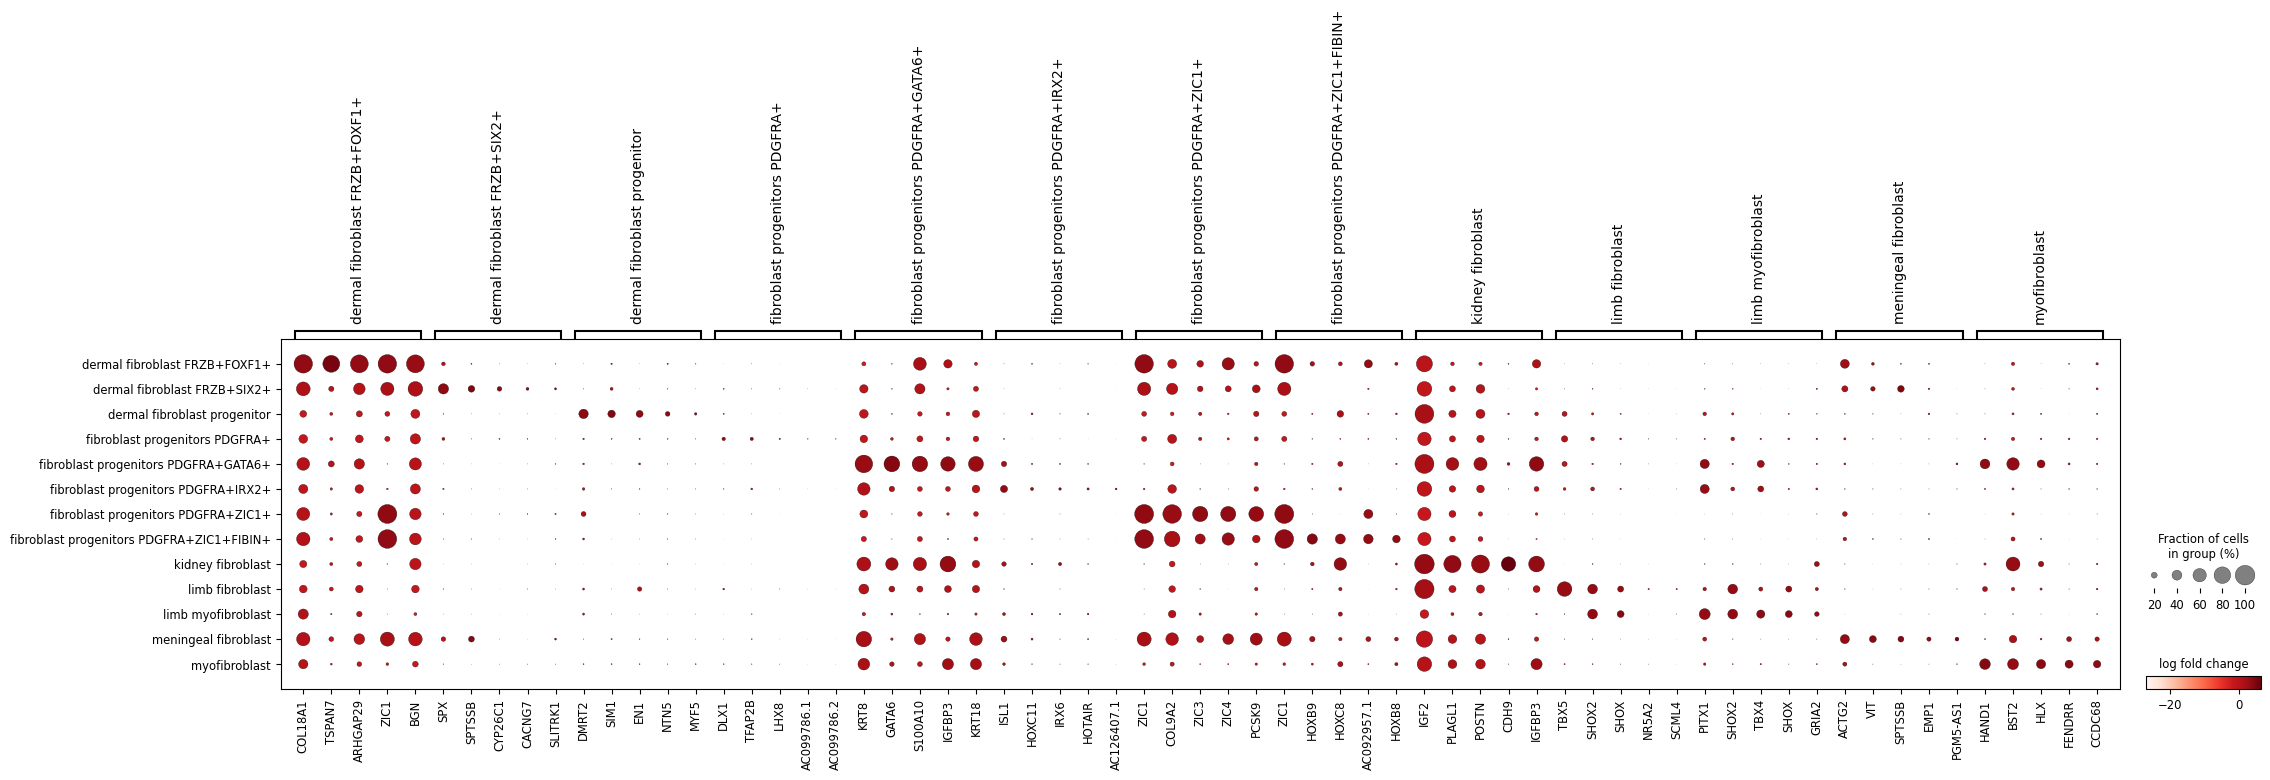

In [4]:
sc.pl.rank_genes_groups_dotplot(fibro, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=5, dendrogram=False)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


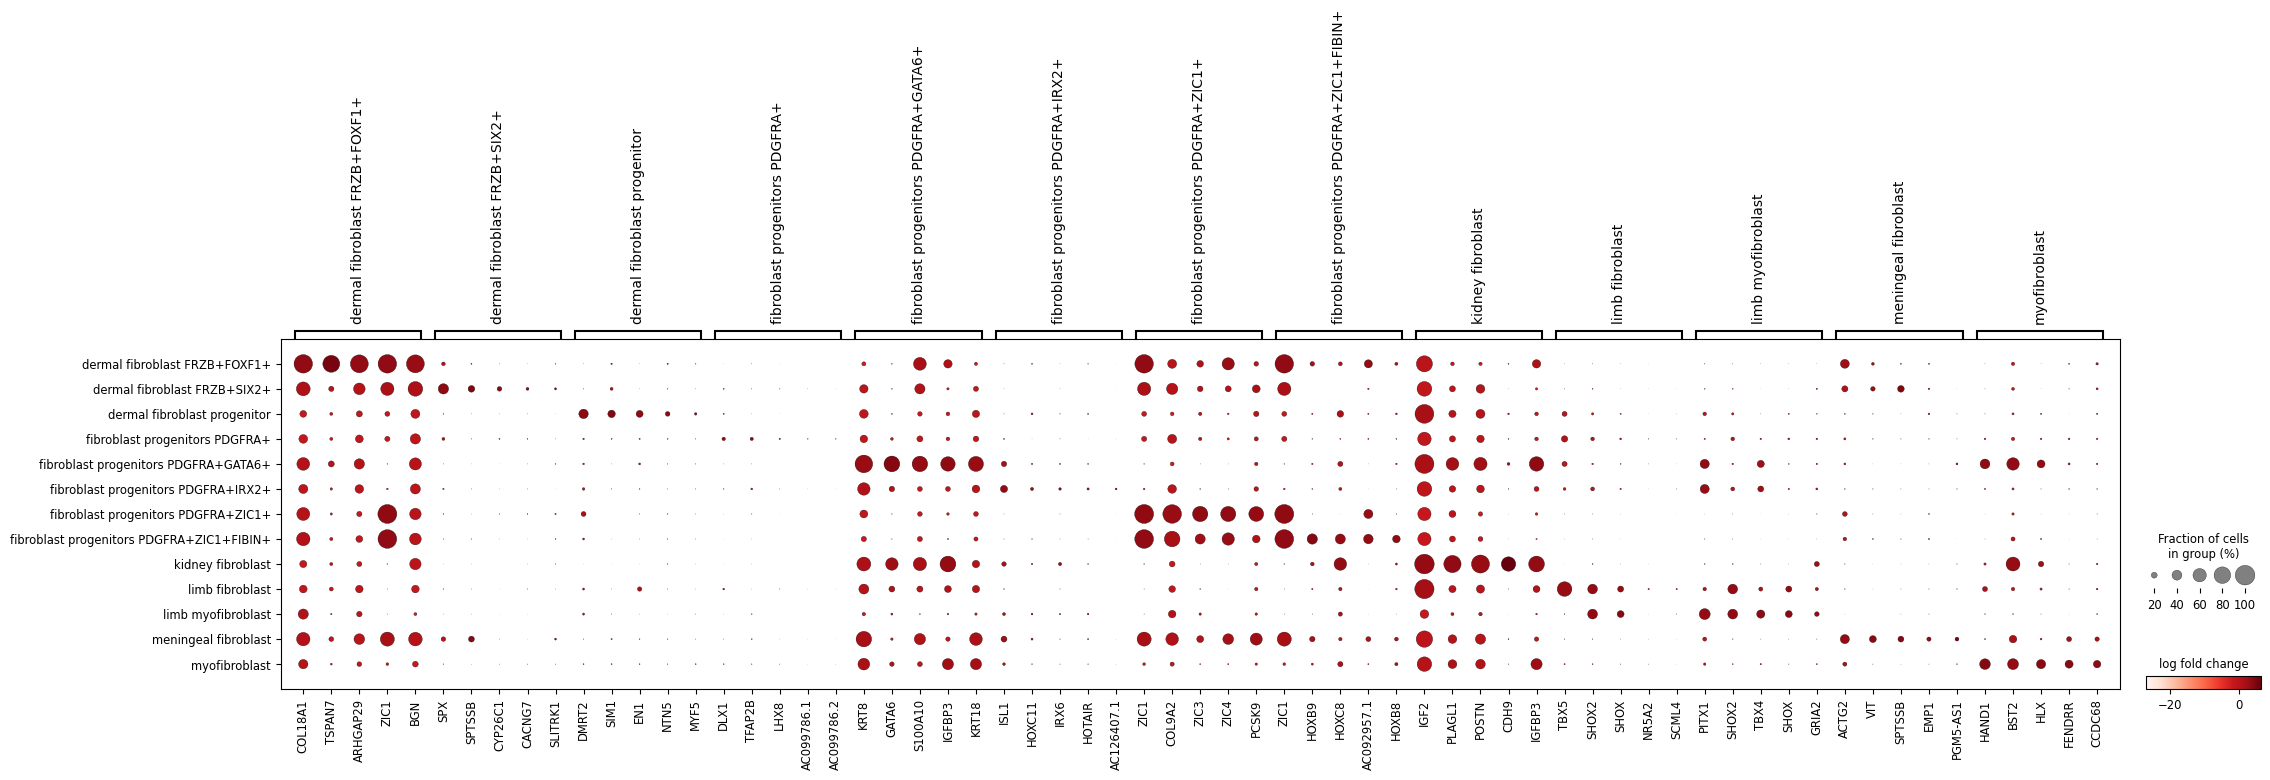

In [100]:
sc.pl.rank_genes_groups_dotplot(fibro, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=5, dendrogram=False)

In [106]:
new_categories = ['dermal fibroblast FRZB+FOXF1+',
                  'dermal fibroblast FRZB+SIX2+',
                  'meningeal fibroblast',
                  'myofibroblast',
                  'limb myofibroblast',
                  'limb fibroblast',
                  'kidney fibroblast',
                  'dermal fibroblast progenitor',
                  'fibroblast progenitors PDGFRA+',
                  'fibroblast progenitors PDGFRA+IRX2+',
                  'fibroblast progenitors PDGFRA+GATA6+',
                  'fibroblast progenitors PDGFRA+ZIC1+',
                  'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',]

In [107]:
fibroV1 = fibro.copy()

In [108]:
fibroV1.obs['cell_type_lvl5'] = fibroV1.obs['cell_type_lvl5'].astype('category')
fibroV1.obs.cell_type_lvl5 = fibroV1.obs.cell_type_lvl5.cat.reorder_categories(new_categories)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


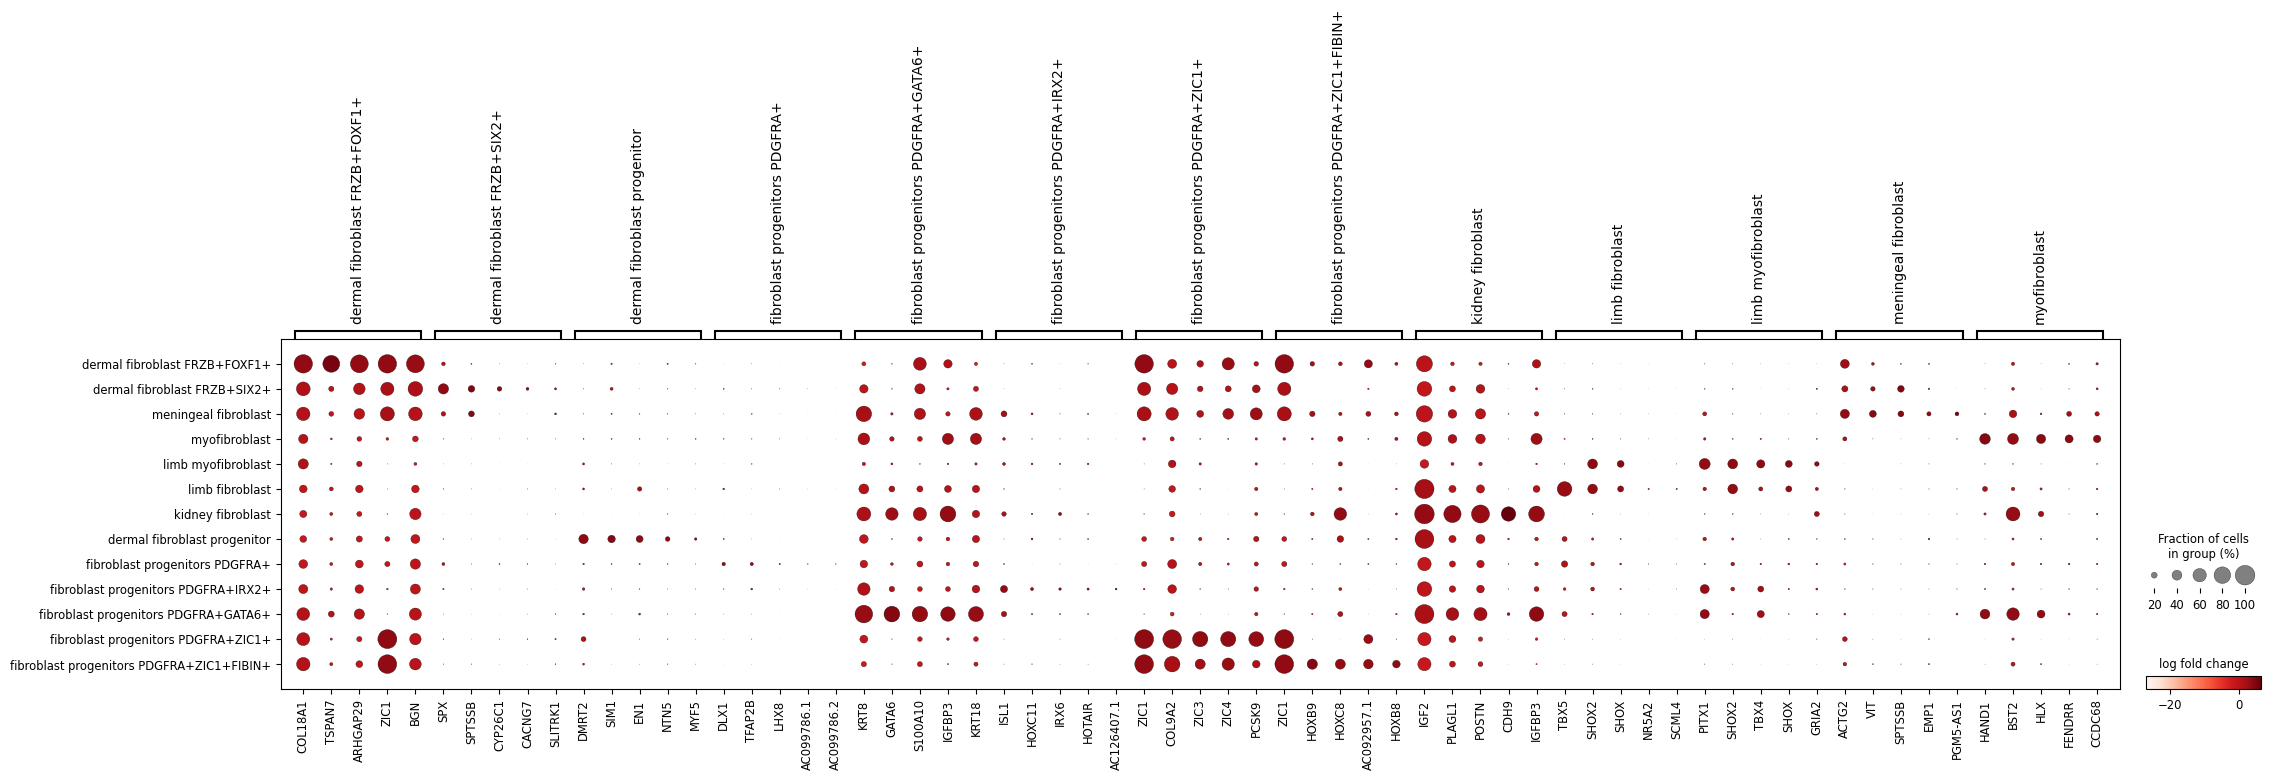

In [109]:
sc.pl.rank_genes_groups_dotplot(fibroV1, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=5, dendrogram=False)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


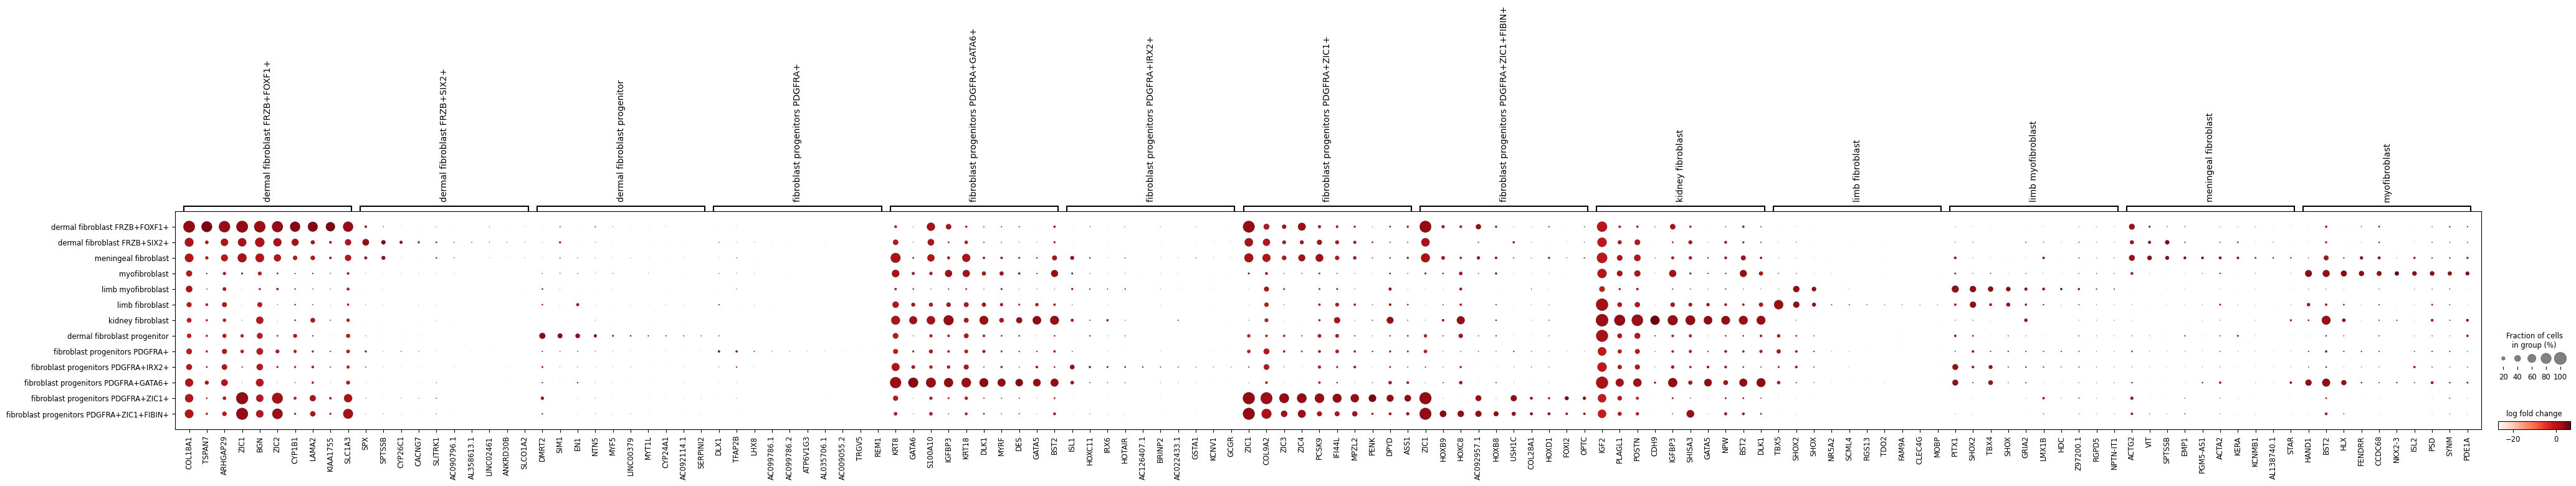

In [110]:
sc.pl.rank_genes_groups_dotplot(fibroV1, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=10, dendrogram=False)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


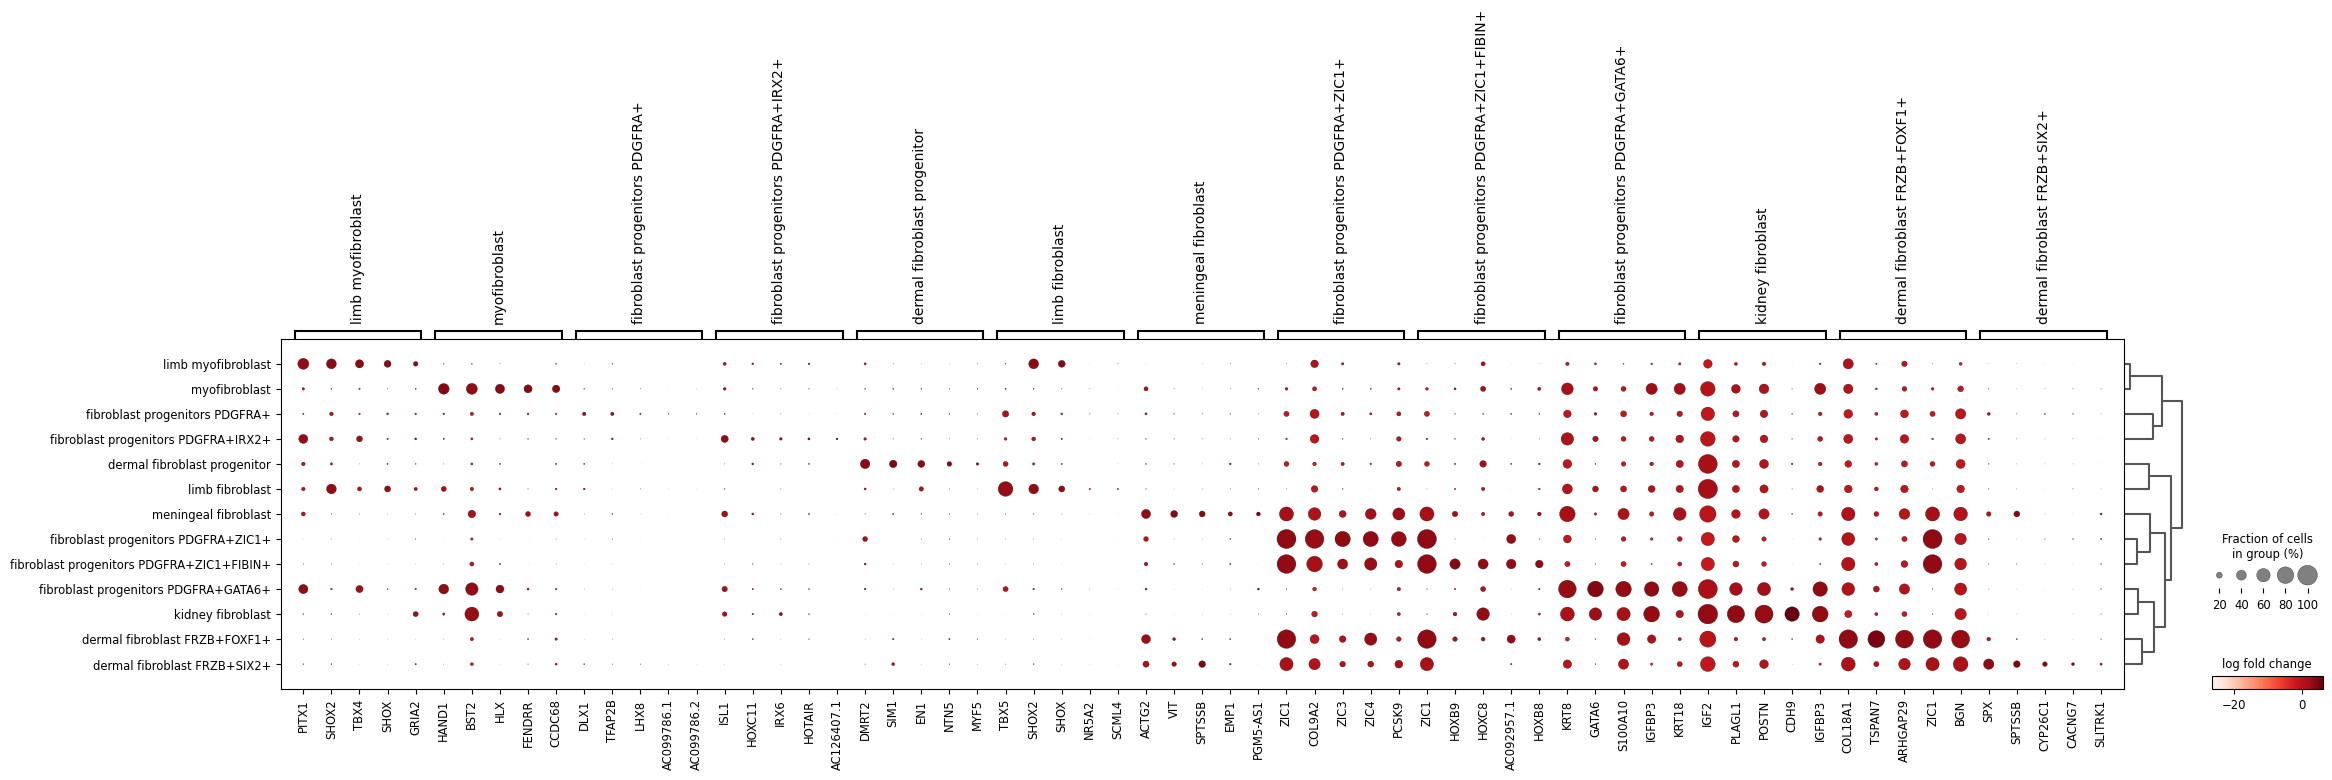

In [111]:
sc.pl.rank_genes_groups_dotplot(fibroV1, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=5, dendrogram=True)

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


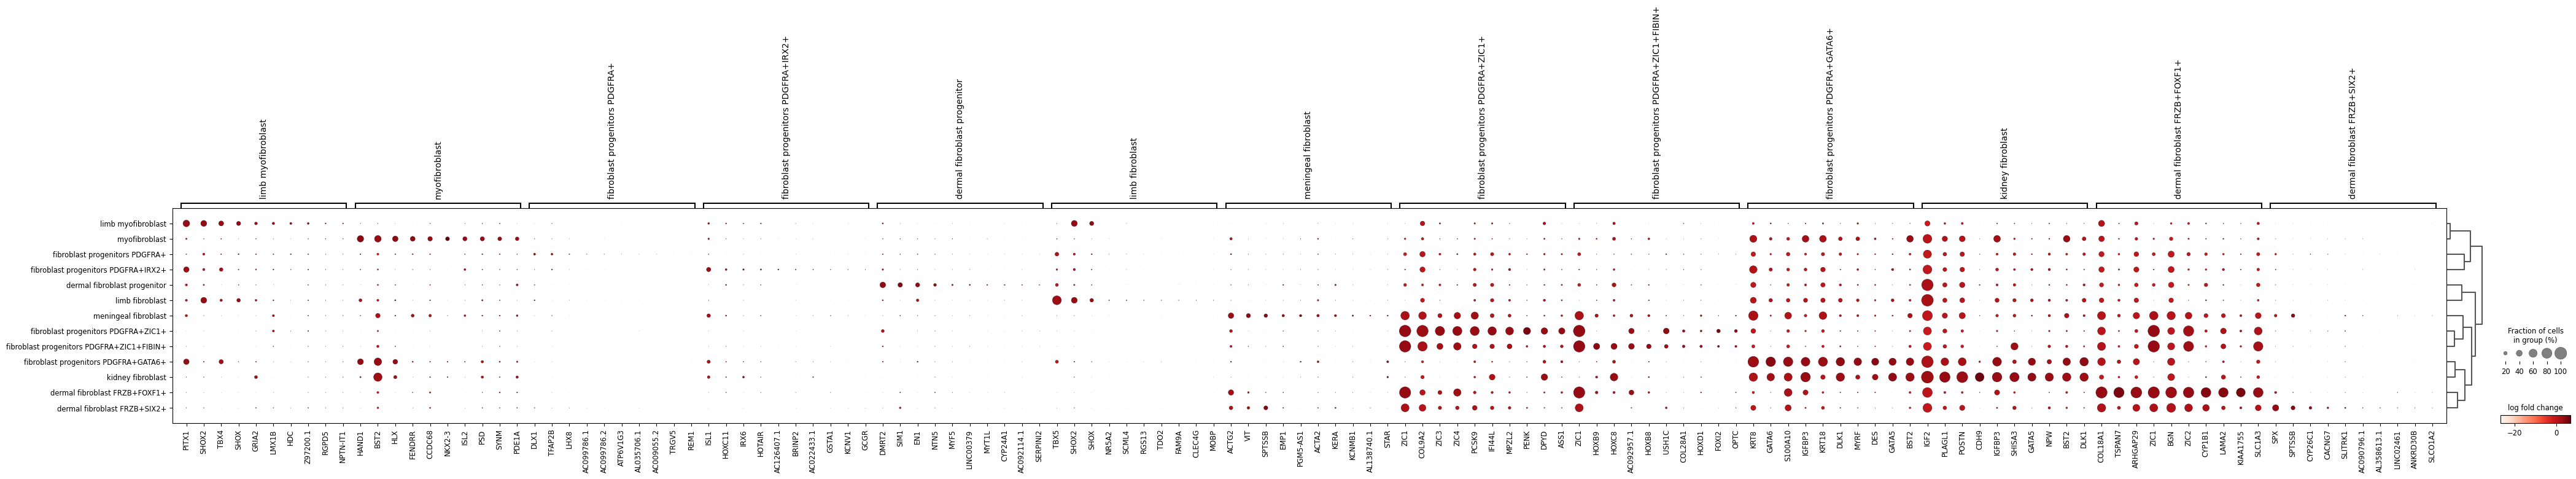

In [112]:
sc.pl.rank_genes_groups_dotplot(fibroV1, values_to_plot='logfoldchanges', min_logfoldchange=3, n_genes=10, dendrogram=True)

In [5]:
result = fibro.uns['rank_genes_groups']
groups= result['names'].dtype.names
df= pd.DataFrame(
    {group + '_' + key[:15]:result [key][group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [6]:
df

,dermal fibroblast FRZB+FOXF1+_names,dermal fibroblast FRZB+FOXF1+_scores,dermal fibroblast FRZB+FOXF1+_pvals,dermal fibroblast FRZB+FOXF1+_pvals_adj,dermal fibroblast FRZB+FOXF1+_logfoldchanges,dermal fibroblast FRZB+SIX2+_names,dermal fibroblast FRZB+SIX2+_scores,dermal fibroblast FRZB+SIX2+_pvals,dermal fibroblast FRZB+SIX2+_pvals_adj,dermal fibroblast FRZB+SIX2+_logfoldchanges,...,meningeal fibroblast_names,meningeal fibroblast_scores,meningeal fibroblast_pvals,meningeal fibroblast_pvals_adj,meningeal fibroblast_logfoldchanges,myofibroblast_names,myofibroblast_scores,myofibroblast_pvals,myofibroblast_pvals_adj,myofibroblast_logfoldchanges
0,VCAN,165.561905,0.0,0.0,2.986042,S100A11,66.231552,0.0,0.0,1.453858,...,MYL9,75.015343,0.0,0.0,1.940160,MT-ATP6,77.947838,0.0,0.0,1.078139
1,COL18A1,157.640137,0.0,0.0,3.452898,MARCKS,63.347466,0.0,0.0,1.109261,...,HMGN2,70.666496,0.0,0.0,1.007064,MTRNR2L12,71.017708,0.0,0.0,1.346559
2,TSPAN7,152.725616,0.0,0.0,5.284525,TMSB4X,60.143085,0.0,0.0,0.963555,...,ACTB,69.150688,0.0,0.0,0.495610,MT-ND4,65.032387,0.0,0.0,0.919751
3,ARHGAP29,150.898331,0.0,0.0,3.361230,RND3,59.019547,0.0,0.0,1.531631,...,KRT8,64.873405,0.0,0.0,1.739539,KCNQ1OT1,62.956535,0.0,0.0,1.452232
4,ZIC1,148.134598,0.0,0.0,3.400494,FRZB,57.202335,0.0,0.0,1.460055,...,RGS5,64.576988,0.0,0.0,2.738543,MT-CO3,62.949436,0.0,0.0,0.871630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,TMSB15A,-107.354141,0.0,0.0,-1.819827,CRABP2,-37.896065,0.0,0.0,-0.923281,...,LINC01578,-39.394520,0.0,0.0,-0.926175,H3F3A,-88.064232,0.0,0.0,-1.116176
34580,CD24,-113.903755,0.0,0.0,-2.066626,H19,-40.290234,0.0,0.0,-2.489355,...,JUND,-40.860569,0.0,0.0,-1.003103,TMSB10,-91.117821,0.0,0.0,-1.333523
34581,PTMA,-114.304619,0.0,0.0,-0.589244,H3F3A,-42.949100,0.0,0.0,-0.273388,...,PNRC1,-47.123295,0.0,0.0,-0.918555,RPS4X,-95.172173,0.0,0.0,-1.395045
34582,CRABP1,-123.390846,0.0,0.0,-5.187161,TUBB2B,-44.418972,0.0,0.0,-1.560362,...,MALAT1,-50.864079,0.0,0.0,-0.475433,ACTG1,-96.787415,0.0,0.0,-1.059055


In [7]:
df.to_csv('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/fibroblast_markers_all.csv')